# Init

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')

In [4]:
! gdown --id 15Fq4ilUyqOUoCEugjzmE_QMSofESam5o

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15Fq4ilUyqOUoCEugjzmE_QMSofESam5o
To: /content/1.5-Million-Netflix-Google-Store-Reviews.zip
100% 119M/119M [00:02<00:00, 47.0MB/s]


In [5]:
! unzip /content/1.5-Million-Netflix-Google-Store-Reviews.zip

Archive:  /content/1.5-Million-Netflix-Google-Store-Reviews.zip
  inflating: NETFLIX_REVIEWS.csv     


In [6]:
df = pd.read_csv('/content/NETFLIX_REVIEWS.csv', encoding='utf-8')

In [8]:
df['review_timestamp'] = pd.to_datetime(df['review_timestamp'])

# Sample

In [9]:
df['year'] = df['review_timestamp'].dt.year

In [ ]:
df.shape

(1531126, 10)

In [14]:
df.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp,year
0,0,7e73f80e-a8fd-4ff3-b09b-502f0ad058ff,152618553977019693742,A Google user,Works great on my Evo! Glad android phones are...,5,1,1.2.0 build 819145-1.2.0-102,2011-05-12 18:50:37,2011
1,1,dab55eca-c2a0-45a8-93e3-9860c1c548da,234382942865437071667,A Google user,Works great on HTC incredible. Can't wait to t...,5,1,1.2.0 build 819145-1.2.0-102,2011-05-12 18:50:52,2011
2,2,a3b8fa06-8b8f-4f2f-a1fa-fd37c4cbf598,174473604608358796368,A Google user,Works great on nexus s,5,0,1.5.2 build 389,2011-05-12 18:55:14,2011
3,3,837fdfa5-606d-4cec-9e9a-e4a83dad633e,286593453219054880269,A Google user,"Working perfect for me on EVO, running CM 7.0.3.1",5,0,1.2.1 build 843839-1.2.0-30,2011-05-12 19:31:46,2011
4,4,a8aaecb2-6984-44f7-b958-3f89f64d75f9,167276875678680630145,A Google user,cm7 2.3.3 N1,5,0,1.5.2 build 389,2011-05-12 19:32:50,2011


In [ ]:
df['author_name'].nunique()

291960

In [ ]:
df['review_timestamp'] = pd.to_datetime(df['review_timestamp'])

In [ ]:
df.dtypes

Unnamed: 0                     int64
review_id                     object
pseudo_author_id              object
author_name                   object
review_text                   object
review_rating                  int64
review_likes                   int64
author_app_version            object
review_timestamp      datetime64[ns]
dtype: object

In [ ]:
df[df['review_rating'] == 2].resample('Y')['review_id'].nunique()

review_timestamp
2011-12-31    1830
2012-12-31    3283
2013-12-31    3219
2014-12-31    4531
2015-12-31    4208
2016-12-31    4213
2017-12-31    4526
2018-12-31    5328
2019-12-31    5682
2020-12-31    9207
2021-12-31    6802
2022-12-31    6006
2023-12-31    3955
Freq: A-DEC, Name: review_id, dtype: int64

In [10]:
t = df.groupby(['year','review_rating'], as_index=False).agg({'review_id': 'count'}).sort_values(('year'), ascending=True)

In [ ]:
t

,year,review_rating,review_id
0,2011,0,18
1,2011,1,8593
2,2011,2,1830
3,2011,3,2257
4,2011,4,3926
...,...,...,...
66,2023,4,6172
63,2023,1,41226
64,2023,2,3955
65,2023,3,4321


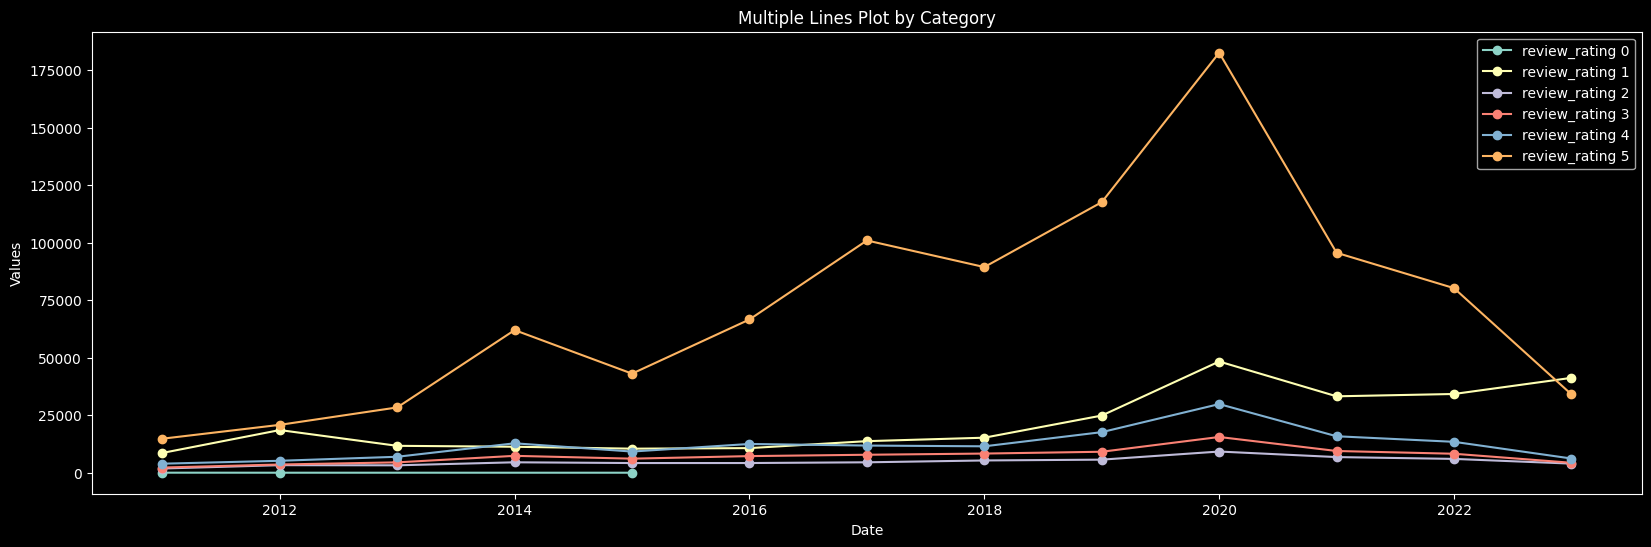

In [12]:
# Строим график
plt.figure(figsize=(20, 6))

# Группируем по категории и строим линии для каждой группы
for review_rating, group in t.groupby('review_rating'):
    plt.plot(group['year'], group['review_id'], label=f'review_rating {review_rating}', marker='o')

# Добавляем подписи
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Multiple Lines Plot by Category')
plt.legend()

In [13]:
for review_rating, group in t.groupby('review_rating'):
    print(group)

    year  review_rating  review_id
0   2011              0         18
6   2012              0          4
22  2015              0          1
    year  review_rating  review_id
1   2011              1       8593
7   2012              1      18538
12  2013              1      11693
17  2014              1      11291
23  2015              1      10449
28  2016              1      10699
33  2017              1      13718
38  2018              1      15222
43  2019              1      24841
48  2020              1      48331
53  2021              1      33203
58  2022              1      34217
63  2023              1      41226
    year  review_rating  review_id
2   2011              2       1830
8   2012              2       3283
13  2013              2       3219
18  2014              2       4531
24  2015              2       4208
29  2016              2       4213
34  2017              2       4526
39  2018              2       5328
44  2019              2       5682
49  2020            